In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('austin.txt', sep=',')
column_labels_list = ['Wban',
 'date',
 'Time',
 'StationType',
 'sky_condition',
 'sky_conditionFlag',
 'visibility',
 'visibilityFlag',
 'wx_and_obst_to_vision',
 'wx_and_obst_to_visionFlag',
 'dry_bulb_faren',
 'dry_bulb_farenFlag',
 'dry_bulb_cel',
 'dry_bulb_celFlag',
 'wet_bulb_faren',
 'wet_bulb_farenFlag',
 'wet_bulb_cel',
 'wet_bulb_celFlag',
 'dew_point_faren',
 'dew_point_farenFlag',
 'dew_point_cel',
 'dew_point_celFlag',
 'relative_humidity',
 'relative_humidityFlag',
 'wind_speed',
 'wind_speedFlag',
 'wind_direction',
 'wind_directionFlag',
 'value_for_wind_character',
 'value_for_wind_characterFlag',
 'station_pressure',
 'station_pressureFlag',
 'pressure_tendency',
 'pressure_tendencyFlag',
 'presschange',
 'presschangeFlag',
 'sea_level_pressure',
 'sea_level_pressureFlag',
 'record_type',
 'hourly_precip',
 'hourly_precipFlag',
 'altimeter',
 'altimeterFlag',
 'junk']
list_to_drop = ['sky_conditionFlag',
 'visibilityFlag',
 'wx_and_obst_to_vision',
 'wx_and_obst_to_visionFlag',
 'dry_bulb_farenFlag',
 'dry_bulb_celFlag',
 'wet_bulb_farenFlag',
 'wet_bulb_celFlag',
 'dew_point_farenFlag',
 'dew_point_celFlag',
 'relative_humidityFlag',
 'wind_speedFlag',
 'wind_directionFlag',
 'value_for_wind_character',
 'value_for_wind_characterFlag',
 'station_pressureFlag',
 'pressure_tendencyFlag',
 'pressure_tendency',
 'presschange',
 'presschangeFlag',
 'sea_level_pressureFlag',
 'hourly_precip',
 'hourly_precipFlag',
 'altimeter',
 'record_type',
 'altimeterFlag',
 'junk']
df.head()

,13904,20110101,0053,12,OVC045,,10.00,.1,.2,.3,...,.18,.19,29.95,.20,AA,.21,.22,.23,29.95.1,.24
0,13904,20110101,153,12,OVC049,,10.00,,,,...,,,30.01,,AA,,,,30.02,
1,13904,20110101,253,12,OVC060,,10.00,,,,...,030,,30.01,,AA,,,,30.02,
2,13904,20110101,353,12,OVC065,,10.00,,,,...,,,30.03,,AA,,,,30.04,
3,13904,20110101,453,12,BKN070,,10.00,,,,...,,,30.04,,AA,,,,30.04,
4,13904,20110101,553,12,BKN065,,10.00,,,,...,015,,30.06,,AA,,,,30.06,


In [4]:
df.columns = column_labels_list

# Remove the appropriate columns: df_dropped
df_dropped = df.drop(list_to_drop, axis='columns')

# Print the output of df_dropped.head()
print(df_dropped.head())


    Wban      date  Time  StationType sky_condition visibility dry_bulb_faren  \
0  13904  20110101   153           12        OVC049      10.00             51   
1  13904  20110101   253           12        OVC060      10.00             51   
2  13904  20110101   353           12        OVC065      10.00             50   
3  13904  20110101   453           12        BKN070      10.00             50   
4  13904  20110101   553           12        BKN065      10.00             49   

  dry_bulb_cel wet_bulb_faren wet_bulb_cel dew_point_faren dew_point_cel  \
0         10.6             37          3.0              14         -10.0   
1         10.6             37          2.9              13         -10.6   
2         10.0             38          3.1              17          -8.3   
3         10.0             37          2.8              15          -9.4   
4          9.4             37          2.8              17          -8.3   

  relative_humidity wind_speed wind_direction station_pr

In [6]:
df['date'] = df.date.astype(str)
df['Time'] = df.Time.apply(lambda x: '{:0>4}'.format(x))
print(df['Time'].head(20))

0     0153
1     0253
2     0353
3     0453
4     0553
5     0653
6     0753
7     0853
8     0953
9     1053
10    1153
11    1253
12    1353
13    1453
14    1553
15    1653
16    1753
17    1853
18    1953
19    2053
Name: Time, dtype: object


In [9]:
date_string = df['date'] + df['Time']
datatimes = pd.to_datetime(date_string, format='%Y%m%d%H%M')
print(datatimes.head())

0   2011-01-01 01:53:00
1   2011-01-01 02:53:00
2   2011-01-01 03:53:00
3   2011-01-01 04:53:00
4   2011-01-01 05:53:00
dtype: datetime64[ns]


In [26]:
df_clean = df_dropped.set_index(datatimes)
df_clean = df_clean.drop(['date', 'Time'], axis=1)
df_clean.head()

,Wban,StationType,sky_condition,visibility,dry_bulb_faren,dry_bulb_cel,wet_bulb_faren,wet_bulb_cel,dew_point_faren,dew_point_cel,relative_humidity,wind_speed,wind_direction,station_pressure,sea_level_pressure
2011-01-01 01:53:00,13904,12,OVC049,10.00,51,10.6,37,3.0,14,-10.0,23,10,340,29.49,30.01
2011-01-01 02:53:00,13904,12,OVC060,10.00,51,10.6,37,2.9,13,-10.6,22,15,010,29.49,30.01
2011-01-01 03:53:00,13904,12,OVC065,10.00,50,10.0,38,3.1,17,-8.3,27,7,350,29.51,30.03
2011-01-01 04:53:00,13904,12,BKN070,10.00,50,10.0,37,2.8,15,-9.4,25,11,020,29.51,30.04
2011-01-01 05:53:00,13904,12,BKN065,10.00,49,9.4,37,2.8,17,-8.3,28,6,010,29.53,30.06


In [62]:
df_clean['visibility'] = pd.to_numeric(df_clean['visibility'], errors='coerce')
df_clean.info()
df_clean = df_clean.dropna()
df_clean.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8464 entries, 2011-01-01 01:53:00 to 2011-12-31 23:53:00
Data columns (total 15 columns):
Wban                  8464 non-null int64
StationType           8464 non-null int64
sky_condition         8464 non-null object
visibility            8464 non-null float64
dry_bulb_faren        8464 non-null float64
dry_bulb_cel          8464 non-null float64
wet_bulb_faren        8464 non-null float64
wet_bulb_cel          8464 non-null float64
dew_point_faren       8464 non-null float64
dew_point_cel         8464 non-null float64
relative_humidity     8464 non-null float64
wind_speed            8464 non-null float64
wind_direction        8464 non-null float64
station_pressure      8464 non-null float64
sea_level_pressure    8464 non-null float64
dtypes: float64(12), int64(2), object(1)
memory usage: 1.3+ MB


,Wban,StationType,sky_condition,visibility,dry_bulb_faren,dry_bulb_cel,wet_bulb_faren,wet_bulb_cel,dew_point_faren,dew_point_cel,relative_humidity,wind_speed,wind_direction,station_pressure,sea_level_pressure
2011-01-01 01:53:00,13904,12,OVC049,10.0,51.0,10.6,37.0,3.0,14.0,-10.0,23.0,10.0,340.0,29.49,30.01
2011-01-01 02:53:00,13904,12,OVC060,10.0,51.0,10.6,37.0,2.9,13.0,-10.6,22.0,15.0,10.0,29.49,30.01
2011-01-01 03:53:00,13904,12,OVC065,10.0,50.0,10.0,38.0,3.1,17.0,-8.3,27.0,7.0,350.0,29.51,30.03
2011-01-01 04:53:00,13904,12,BKN070,10.0,50.0,10.0,37.0,2.8,15.0,-9.4,25.0,11.0,20.0,29.51,30.04
2011-01-01 05:53:00,13904,12,BKN065,10.0,49.0,9.4,37.0,2.8,17.0,-8.3,28.0,6.0,10.0,29.53,30.06


In [59]:
print(df_clean.dry_bulb_faren.median())
print(df_clean.loc['2011-Jun', 'dry_bulb_faren'].median())

72.0
84.0


In [61]:
sunny = df_clean.loc[df_clean['sky_condition'] == 'CLR']
overcast = df_clean.loc[df_clean['sky_condition'].str.contains('OVC')]
sunny_max = sunny.resample('D').max()
overcast_max = overcast.resample('D').max()

print(sunny_max.mean() - overcast_max.mean())

Wban                  0.000000
StationType           0.000000
dry_bulb_faren        6.470701
dry_bulb_cel          3.602332
wet_bulb_faren       -0.747866
wet_bulb_cel         -0.408467
dew_point_faren      -4.207608
dew_point_cel        -2.332596
relative_humidity    -4.856022
wind_speed           -2.817572
wind_direction       -6.296828
station_pressure      0.003490
sea_level_pressure   -0.000947
dtype: float64


In [66]:
weekly_mean = df_clean[['dry_bulb_faren', 'visibility']].resample('W').mean()
print(weekly_mean.corr())


                dry_bulb_faren  visibility
dry_bulb_faren        1.000000    0.452817
visibility            0.452817    1.000000


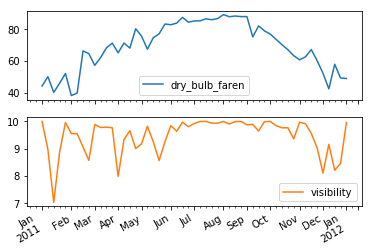

In [67]:
weekly_mean.plot(subplots=True)
plt.show()